# Rainfall Weather Forecasting Project

In [327]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Project Description
Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.
Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia. Here, predict two things:
 
1. Problem Statement: 
a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.
b)  Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.


Dataset Description:
Number of columns: 23


Date  - The date of observation
Location  -The common name of the location of the weather station
MinTemp  -The minimum temperature in degrees celsius
MaxTemp -The maximum temperature in degrees celsius
Rainfall  -The amount of rainfall recorded for the day in mm
Evaporation  -The so-called Class A pan evaporation (mm) in the 24 hours to 9am
Sunshine  -The number of hours of bright sunshine in the day.
WindGustDi r- The direction of the strongest wind gust in the 24 hours to midnight
WindGustSpeed -The speed (km/h) of the strongest wind gust in the 24 hours to midnight
WindDir9am -Direction of the wind at 9am
WindDir3pm -Direction of the wind at 3pm
WindSpeed9am -Wind speed (km/hr) averaged over 10 minutes prior to 9am
WindSpeed3pm -Wind speed (km/hr) averaged over 10 minutes prior to 3pm
Humidity9am -Humidity (percent) at 9am
Humidity3pm -Humidity (percent) at 3pm
Pressure9am -Atmospheric pressure (hpa) reduced to mean sea level at 9am
Pressure3pm -Atmospheric pressure (hpa) reduced to mean sea level at 3pm
Cloud9am - Fraction of sky obscured by cloud at 9am. 
Cloud3pm -Fraction of sky obscured by cloud 
Temp9am-Temperature (degrees C) at 9am
Temp3pm -Temperature (degrees C) at 3pm
RainToday -Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0
RainTomorrow -The amount of next day rain in mm. Used to create response variable . A kind of measure of the "risk".


# Import Dataset

In [328]:
df=pd.read_csv("weatherAUS.csv")
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [329]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [330]:
df.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
8424,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,...,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


In [331]:
df.sample(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
6032,2011-10-06,Melbourne,12.8,20.7,0.0,4.4,3.3,SE,30.0,SW,...,77.0,61.0,1014.8,1012.4,NaN,NaN,15.5,19.3,No,No
14,2008-12-15,Albury,8.4,24.6,0.0,NaN,NaN,NaN,NaN,S,...,57.0,32.0,1009.7,1008.7,NaN,NaN,15.9,23.5,No,NaN
3869,2016-05-02,Williamtown,12.0,25.0,2.8,5.4,NaN,NW,22.0,NNW,...,73.0,67.0,1017.7,1012.8,NaN,1.0,20.5,23.4,Yes,No
6913,2014-12-10,Adelaide,19.1,23.4,0.0,7.4,NaN,SSE,43.0,SW,...,52.0,88.0,1010.9,1011.8,NaN,NaN,22.7,19.5,No,Yes
1009,2009-06-20,CoffsHarbour,12.7,19.2,70.0,NaN,1.6,E,37.0,W,...,97.0,90.0,1025.3,1022.4,8.0,6.0,14.8,17.7,Yes,Yes


# Exploratory Data Analysis

In [332]:
df.shape

(8425, 23)

In [333]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [334]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [335]:
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

<Axes: >

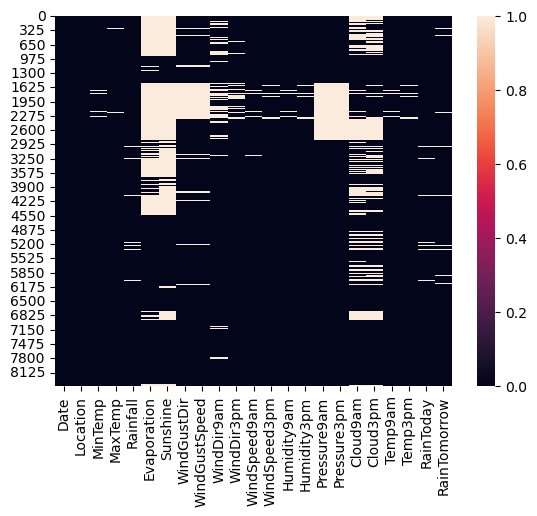

In [336]:
sns.heatmap(df.isnull())

In [337]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MinTemp,8350.0,13.193305,5.403596,-2.0,9.20,13.3,17.4,28.5
MaxTemp,8365.0,23.859976,6.136408,8.2,19.30,23.3,28.0,45.5
Rainfall,8185.0,2.805913,10.459379,0.0,0.00,0.0,1.0,371.0
Evaporation,4913.0,5.389395,5.044484,0.0,2.60,4.6,7.0,145.0
Sunshine,4431.0,7.632205,3.896235,0.0,4.75,8.7,10.7,13.9
WindGustSpeed,7434.0,40.174469,14.665721,7.0,30.00,39.0,50.0,107.0
WindSpeed9am,8349.0,13.847646,10.174579,0.0,6.00,13.0,20.0,63.0
WindSpeed3pm,8318.0,18.533662,9.766986,0.0,11.00,19.0,24.0,83.0
Humidity9am,8366.0,67.822496,16.833283,10.0,56.00,68.0,80.0,100.0
Humidity3pm,8323.0,51.249790,18.423774,6.0,39.00,51.0,63.0,99.0


In [338]:
# filling the missing value with mode 
dfnew=['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']

for i in dfnew:
    df[i] = df[i].fillna(df[i].mode()[0])

In [339]:
# filling the missing value with mean
dfnext=['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 
        'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm']

for i in dfnext:
    df[i] = df[i].fillna(df[i].mean())

In [340]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [341]:
# Changing date into datetime 
df['Date']=pd.to_datetime(df['Date'])

In [342]:
# Splited Date column into day, month ,year
df['Day']=df['Date'].apply(lambda x:x.day)
df['Month']=df['Date'].apply(lambda x:x.month)
df['Year']=df['Date'].apply(lambda x:x.year)
df.sample(3)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
5655,2010-08-25,Melbourne,4.2,11.8,8.2,3.800000,2.900000,N,57.0,N,...,999.7,6.000000,7.000000,7.8,11.5,Yes,No,25,8,2010
7522,2012-08-09,PerthAirport,6.2,20.2,0.0,1.800000,9.900000,ENE,30.0,ENE,...,1024.7,1.000000,1.000000,10.9,19.5,No,No,9,8,2012
8414,2017-06-15,Uluru,2.6,22.5,0.0,5.389395,7.632205,S,19.0,S,...,1021.4,4.566622,4.503183,8.8,22.1,No,No,15,6,2017


In [343]:
# Droping the date column
df.drop(columns=['Date'],axis=1, inplace=True)

In [344]:
df.sample(2)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
3723,Williamtown,19.3,32.2,0.0,8.0,7.1,ENE,35.0,N,ENE,...,1015.2,7.0,7.0,23.9,28.8,No,No,8,12,2015
8028,PerthAirport,19.8,32.3,0.0,12.0,12.2,E,59.0,ESE,SSE,...,1016.6,1.0,0.0,24.2,31.7,No,No,25,2,2014


<Axes: >

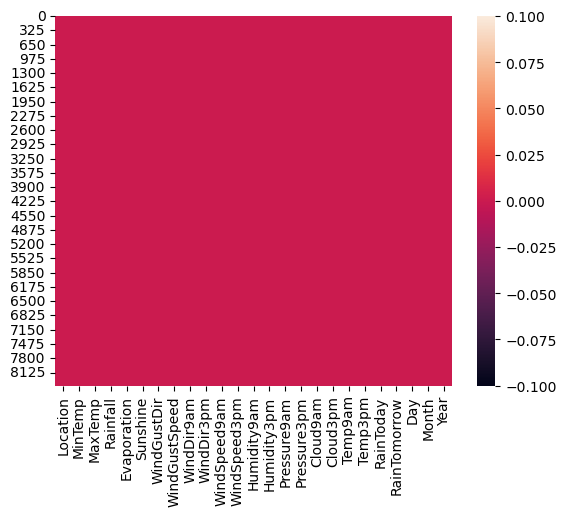

In [345]:
sns.heatmap(df.isnull())

In [346]:
df['RainToday'].value_counts()

No     6435
Yes    1990
Name: RainToday, dtype: int64

<Axes: xlabel='RainToday', ylabel='count'>

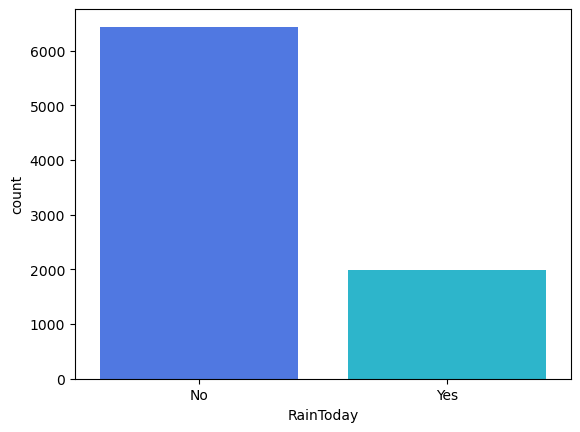

In [347]:
# Countplot of Rain Today
sns.countplot(x='RainToday',data=df)

In [348]:
df['RainTomorrow'].value_counts()

No     6434
Yes    1991
Name: RainTomorrow, dtype: int64

<Axes: xlabel='RainTomorrow', ylabel='count'>

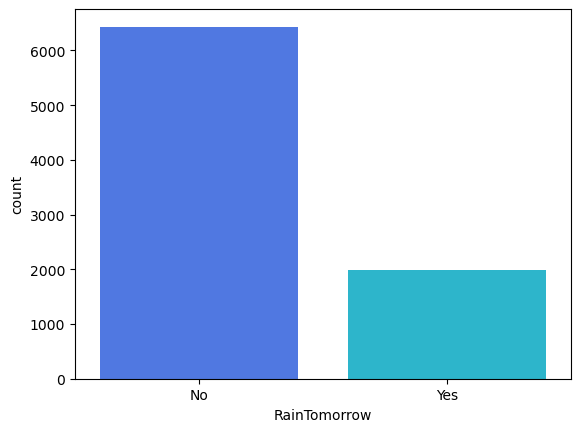

In [349]:
# Countplot of Rain Tomorrow
sns.countplot(x='RainTomorrow',data=df)

In [350]:
df['Location'].value_counts()

Melbourne       1622
Williamtown     1230
PerthAirport    1204
Albury           907
Newcastle        822
CoffsHarbour     611
Brisbane         579
Penrith          482
Wollongong       474
Darwin           250
Adelaide         205
Uluru             39
Name: Location, dtype: int64

<Axes: xlabel='Location', ylabel='count'>

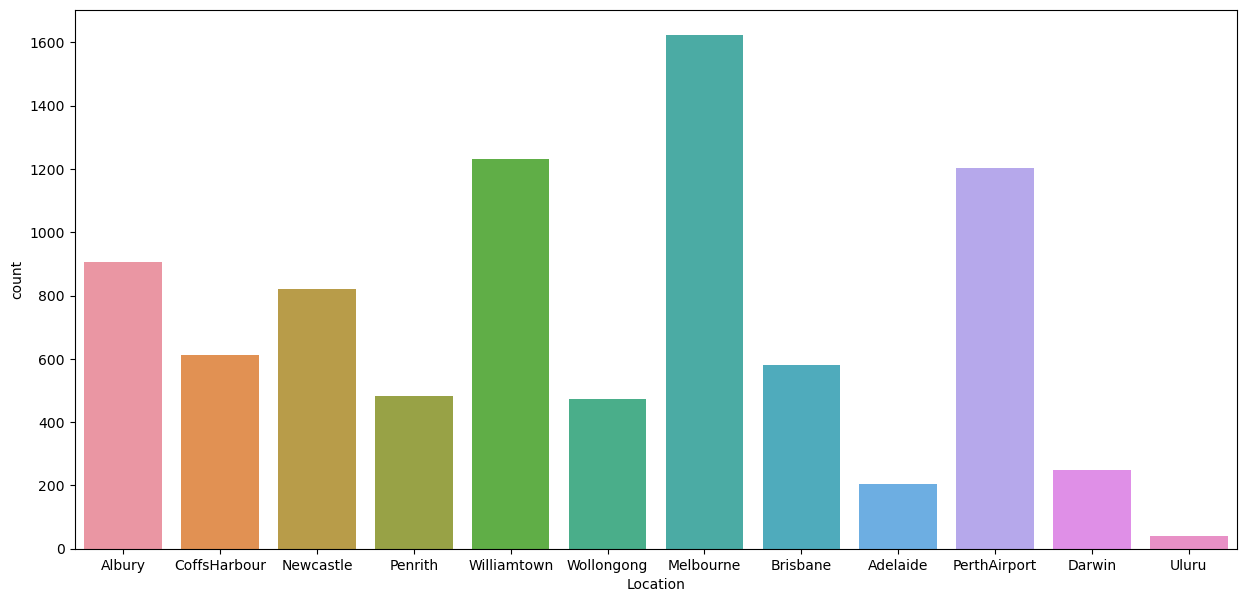

In [351]:
# Countplot of Location
plt.figure(figsize=(15,7))
sns.countplot(x='Location',data=df)

N      1704
SSE     578
S       577
SW      572
E       557
WNW     531
W       507
WSW     504
SE      484
ENE     415
SSW     396
NW      383
NE      353
NNE     343
ESE     302
NNW     219
Name: WindGustDir, dtype: int64


<Axes: xlabel='WindGustDir', ylabel='count'>

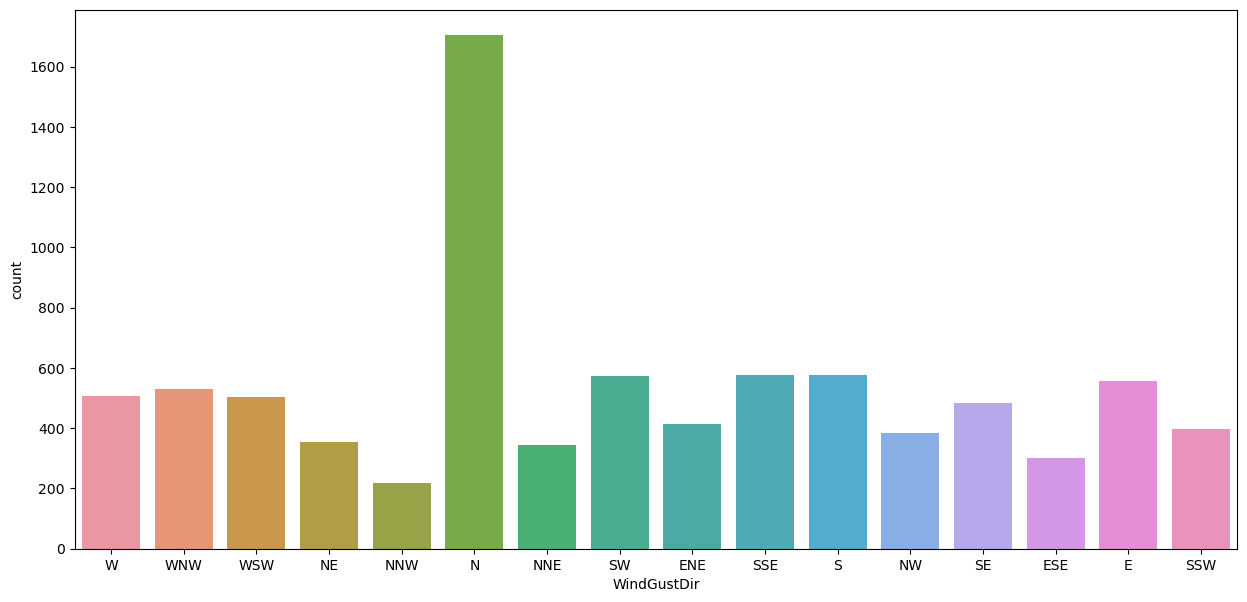

In [352]:
# Countplot of WindGustDir
print(df['WindGustDir'].value_counts())
plt.figure(figsize=(15,7))
sns.countplot(x='WindGustDir',data=df)

N      1735
SW      704
NW      625
WSW     543
SE      505
WNW     480
SSW     467
ENE     433
NNE     430
W       414
NE      409
S       402
E       380
SSE     365
NNW     280
ESE     253
Name: WindDir9am, dtype: int64


<Axes: xlabel='WindDir9am', ylabel='count'>

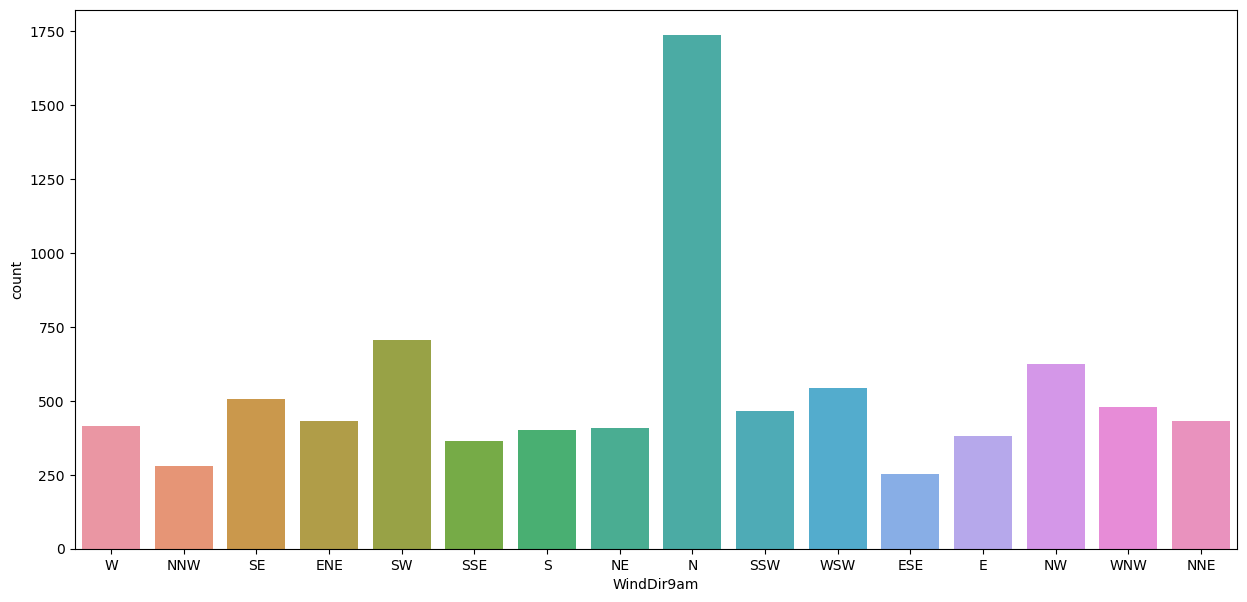

In [353]:
# Countplot of WindDir9am
print(df['WindDir9am'].value_counts())
plt.figure(figsize=(15,7))
sns.countplot(x='WindDir9am',data=df)

SE     1121
S       742
SSE     623
WSW     580
NE      544
N       524
SW      494
WNW     487
NW      468
W       462
ESE     462
E       460
ENE     417
SSW     370
NNE     365
NNW     306
Name: WindDir3pm, dtype: int64


<Axes: xlabel='WindDir3pm', ylabel='count'>

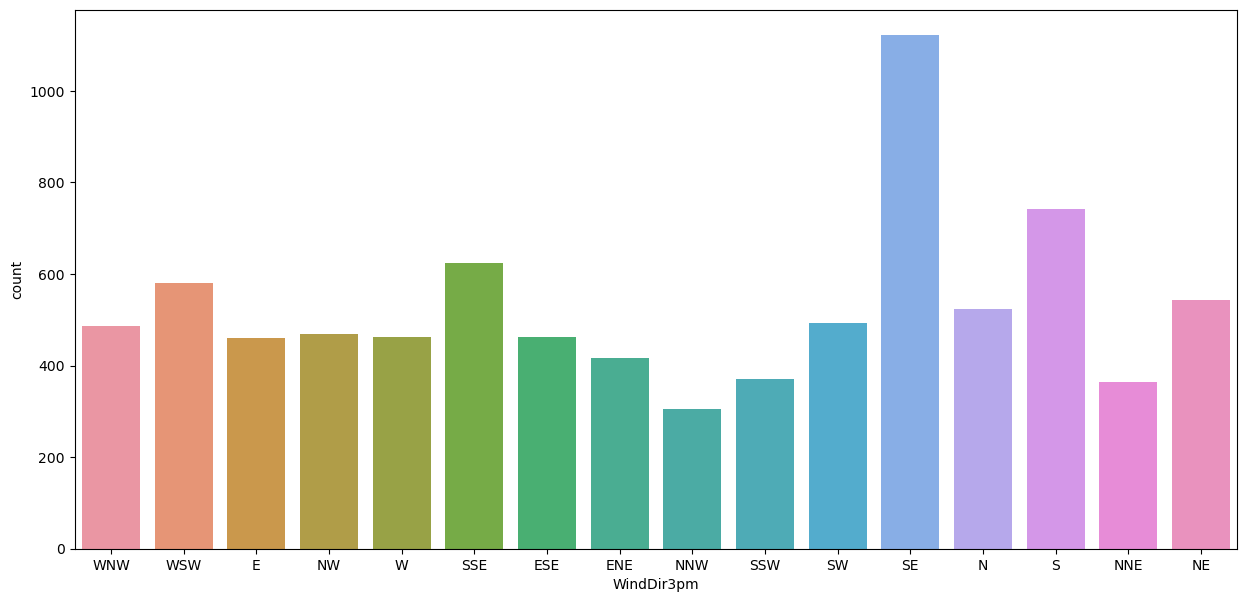

In [354]:
# Countplot of WindDir3pm
print(df['WindDir3pm'].value_counts())
plt.figure(figsize=(15,7))
sns.countplot(x='WindDir3pm',data=df)

<Axes: xlabel='MinTemp', ylabel='Density'>

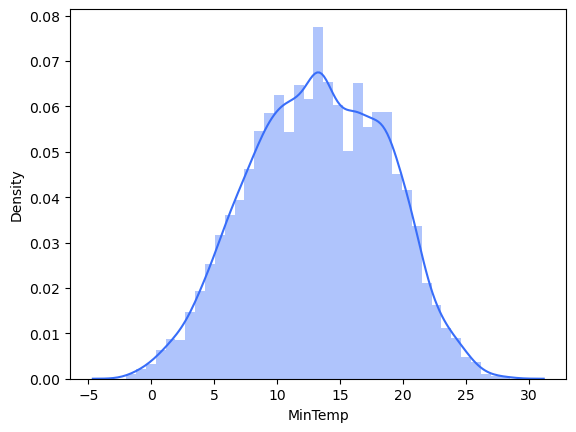

In [355]:
# MinTemp
sns.distplot(df['MinTemp'])

<Axes: xlabel='MaxTemp', ylabel='Density'>

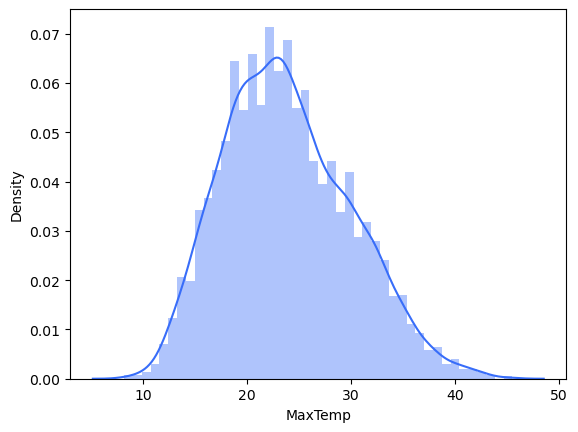

In [356]:
# MaxTemp
sns.distplot(df['MaxTemp'])

In [357]:
# We will create a new Column for Avg by concating the two columns.
df['Avg_WindSpeed']=(df['WindSpeed9am']+df['WindSpeed3pm'])/2
df['Avg_Humidity']=(df['Humidity9am']+df['Humidity3pm'])/2
df['Avg_Cloud']=(df['Cloud9am']+df['Cloud3pm'])/2
df['Avg_Temp'] = (df['Temp9am']+df['Temp3pm'])/2
df['Avg_Pressure']=(df['Pressure9am']+df['Pressure3pm'])/2

In [358]:
# Droping the columns  
df=df.drop(columns = ['WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Pressure9am', 'Pressure3pm'], axis=1)
df.sample(3)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,RainToday,RainTomorrow,Day,Month,Year,Avg_WindSpeed,Avg_Humidity,Avg_Cloud,Avg_Temp,Avg_Pressure
763,Albury,13.6,29.4,0.0,5.389395,7.632205,WNW,35.0,SSE,WNW,No,No,3,1,2011,15.0,42.0,4.534902,24.30,1010.55
3761,Williamtown,16.1,22.0,36.0,5.389395,7.632205,SSW,59.0,S,W,Yes,Yes,15,1,2016,26.0,92.5,4.534902,15.85,1023.15
5662,Melbourne,11.1,13.3,5.8,1.000000,0.000000,N,54.0,N,NNW,Yes,Yes,1,9,2010,12.0,87.0,8.000000,12.00,1014.20


<Axes: xlabel='RainToday', ylabel='Avg_WindSpeed'>

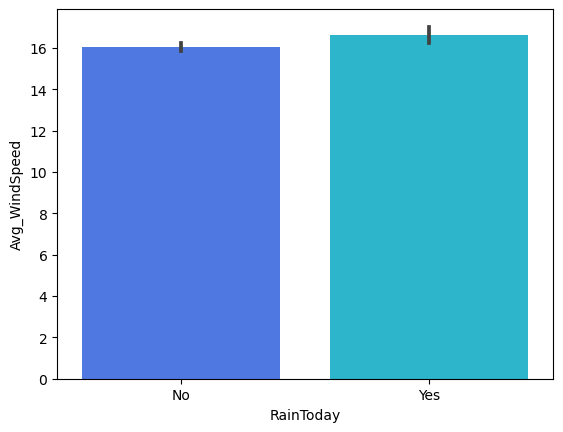

In [359]:
# Relation between Avg_WindSpeed & RainToday
sns.barplot(y='Avg_WindSpeed', x='RainToday', data=df)

<Axes: xlabel='RainToday', ylabel='Avg_Humidity'>

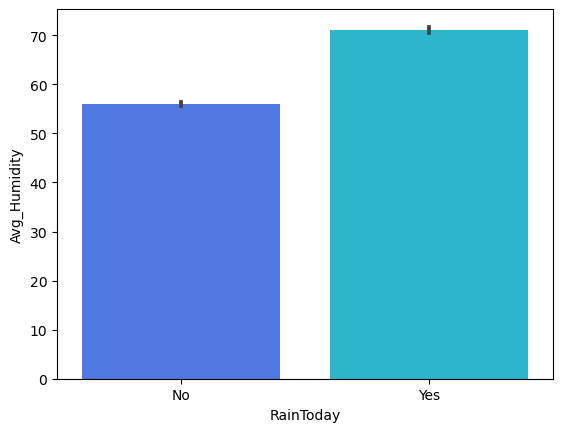

In [360]:
# Relation between Avg_Humidity & RainToday
sns.barplot(y='Avg_Humidity', x='RainToday', data=df)

<Axes: xlabel='RainToday', ylabel='Avg_Cloud'>

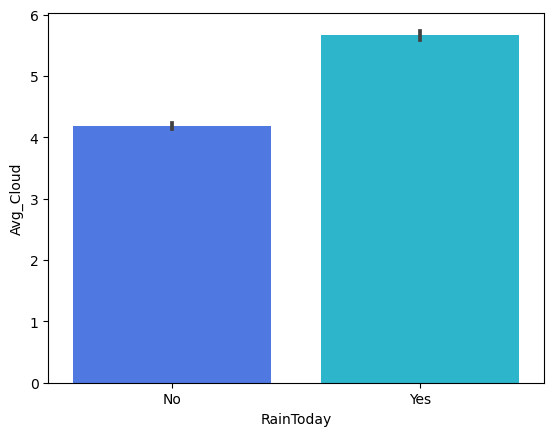

In [361]:
# Relation between Avg_Cloud & RainToday
sns.barplot(y='Avg_Cloud', x='RainToday', data=df)

<Axes: xlabel='RainToday', ylabel='Avg_Temp'>

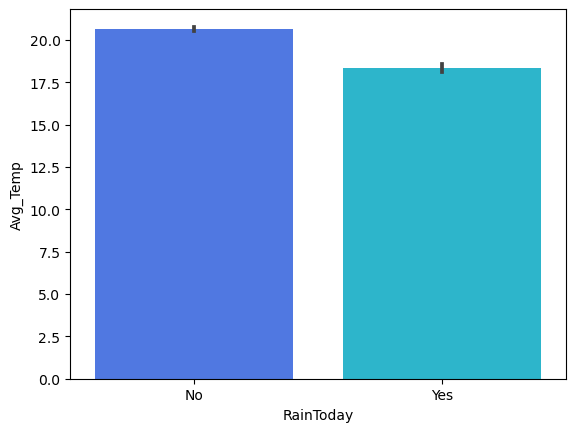

In [362]:
# Relation between Avg_Temp & RainToday
sns.barplot(y='Avg_Temp', x='RainToday', data=df)

<Axes: xlabel='RainToday', ylabel='Avg_Pressure'>

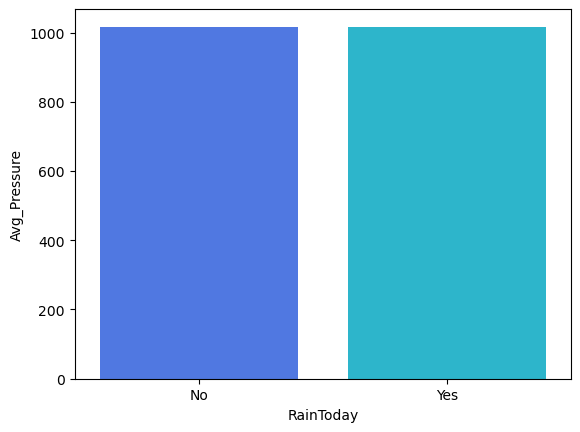

In [363]:
# Relation between Avg_Pressure & RainToday
sns.barplot(y='Avg_Pressure', x='RainToday', data=df)

<Axes: xlabel='Location', ylabel='count'>

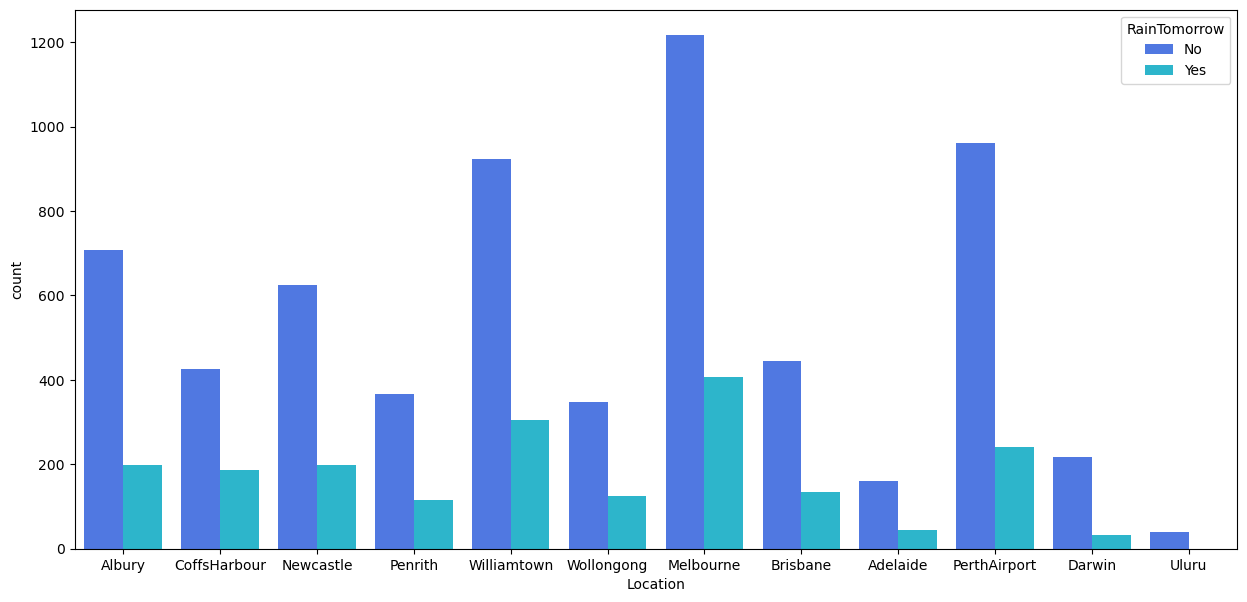

In [364]:
# Countplot relation between location & RainTomorrow
plt.figure(figsize=(15,7))
sns.countplot(x='Location', hue='RainTomorrow', data=df)

<Axes: xlabel='MinTemp', ylabel='MaxTemp'>

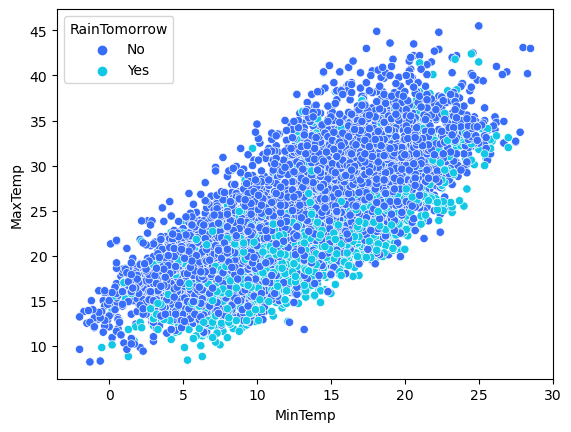

In [365]:
# Scatterplot of MinTemp, MaxTemp with RainTommorrow
sns.scatterplot(x='MinTemp', y='MaxTemp', hue='RainTomorrow', data=df)

<Axes: xlabel='Evaporation', ylabel='Sunshine'>

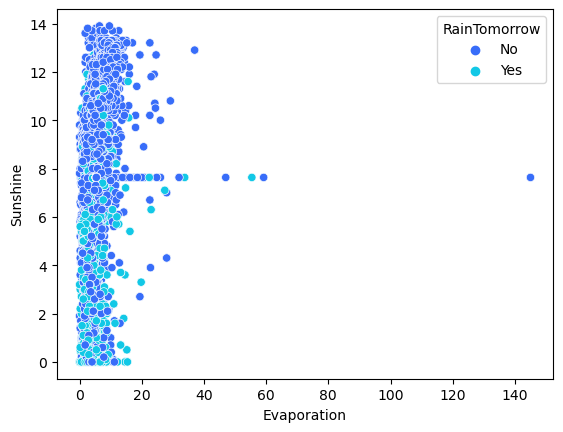

In [366]:
# Scatterplot of Evaporation, Sunshine with RainTommorrow
sns.scatterplot(x='Evaporation', y='Sunshine', hue='RainTomorrow', data=df)

<Axes: xlabel='WindGustDir', ylabel='WindGustSpeed'>

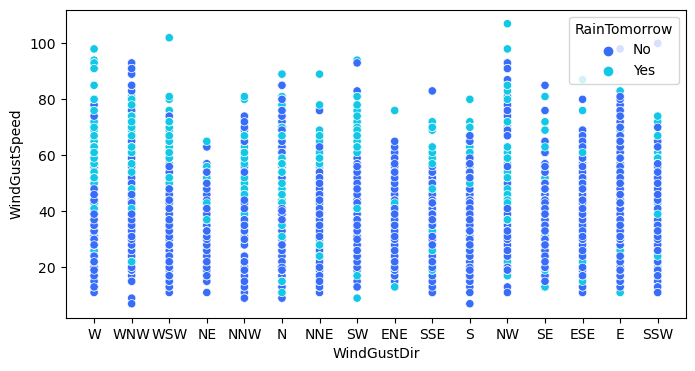

In [367]:
# Scatterplot of WindGustDir, WindGustSpeed with RainTommorrow
plt.figure(figsize=(8,4))
sns.scatterplot(x='WindGustDir', y='WindGustSpeed', hue='RainTomorrow', data=df)

<Axes: xlabel='RainToday', ylabel='count'>

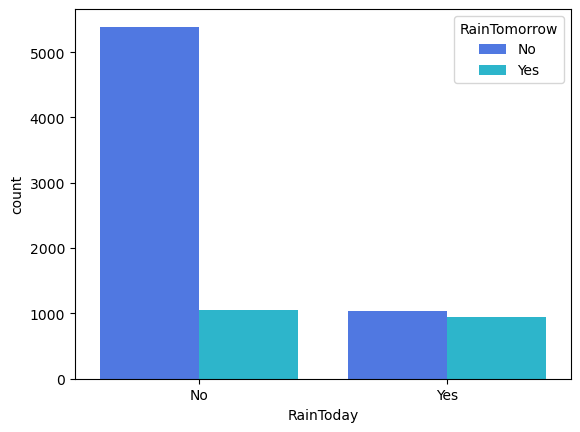

In [368]:
# Countplot relation between RainToday & RainTomorrow
sns.countplot(x='RainToday', hue=df['RainTomorrow'], data=df)

# Encoding categorical data

In [369]:
Category=['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']

In [370]:
# Using Label Encoder on categorical variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Category:
    df[i] = le.fit_transform(df[i])

In [371]:
df.sample(3)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,RainToday,RainTomorrow,Day,Month,Year,Avg_WindSpeed,Avg_Humidity,Avg_Cloud,Avg_Temp,Avg_Pressure
1401,3,4.5,18.2,0.0,2.800000,9.800000,11,31.0,12,9,0,0,17,7,2010,14.0,58.5,1.000000,15.55,1025.7
2925,10,18.4,33.9,0.0,18.000000,9.700000,14,57.0,7,14,0,0,31,1,2016,24.0,30.5,1.000000,29.85,1003.9
3295,10,23.7,33.4,0.0,5.389395,7.632205,6,61.0,4,9,0,1,4,2,2017,18.5,67.5,4.534902,29.70,1011.1


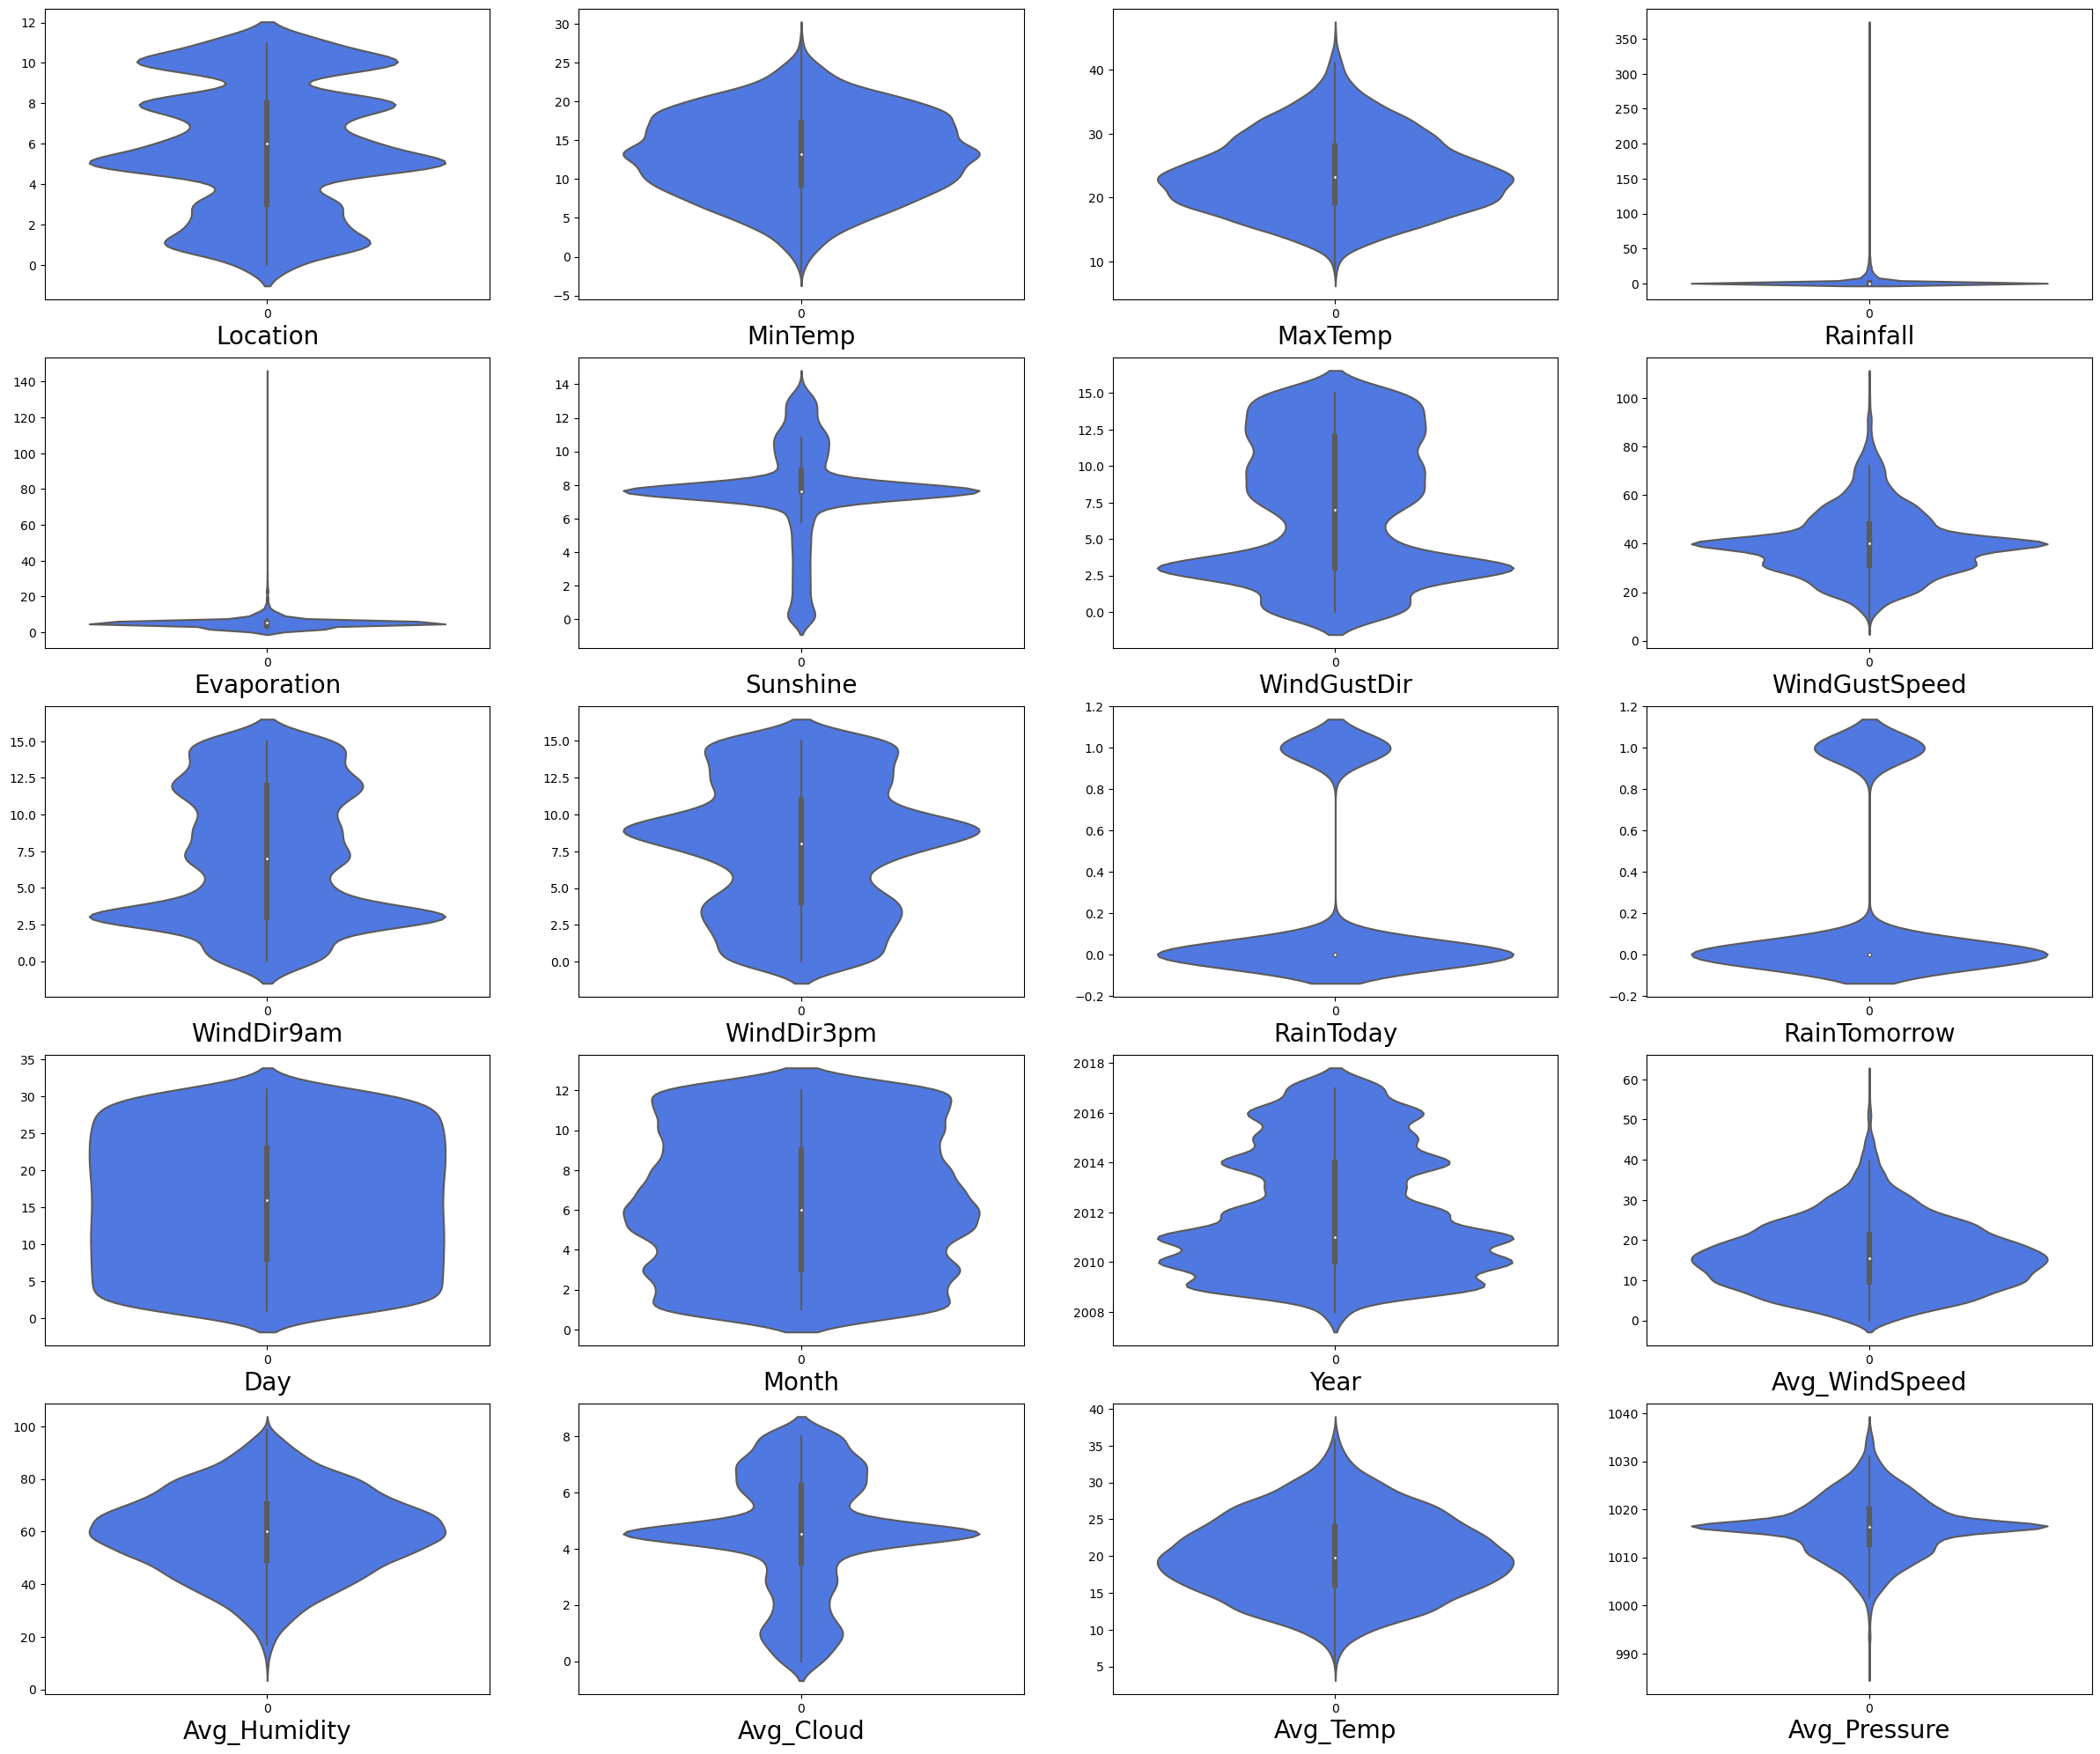

In [372]:
plt.figure(figsize=(30,30), facecolor='white')
plotnumber =1
for column in df:
    if plotnumber <=21:
        ax = plt.subplot(6,4,plotnumber)
        sns.violinplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

# Outliers Detection and Removal

Location             Axes(0.125,0.77;0.168478x0.11)
MinTemp           Axes(0.327174,0.77;0.168478x0.11)
MaxTemp           Axes(0.529348,0.77;0.168478x0.11)
Rainfall          Axes(0.731522,0.77;0.168478x0.11)
Evaporation         Axes(0.125,0.638;0.168478x0.11)
Sunshine         Axes(0.327174,0.638;0.168478x0.11)
WindGustDir      Axes(0.529348,0.638;0.168478x0.11)
WindGustSpeed    Axes(0.731522,0.638;0.168478x0.11)
WindDir9am          Axes(0.125,0.506;0.168478x0.11)
WindDir3pm       Axes(0.327174,0.506;0.168478x0.11)
RainToday        Axes(0.529348,0.506;0.168478x0.11)
RainTomorrow     Axes(0.731522,0.506;0.168478x0.11)
Day                 Axes(0.125,0.374;0.168478x0.11)
Month            Axes(0.327174,0.374;0.168478x0.11)
Year             Axes(0.529348,0.374;0.168478x0.11)
Avg_WindSpeed    Axes(0.731522,0.374;0.168478x0.11)
Avg_Humidity        Axes(0.125,0.242;0.168478x0.11)
Avg_Cloud        Axes(0.327174,0.242;0.168478x0.11)
Avg_Temp         Axes(0.529348,0.242;0.168478x0.11)
Avg_Pressure

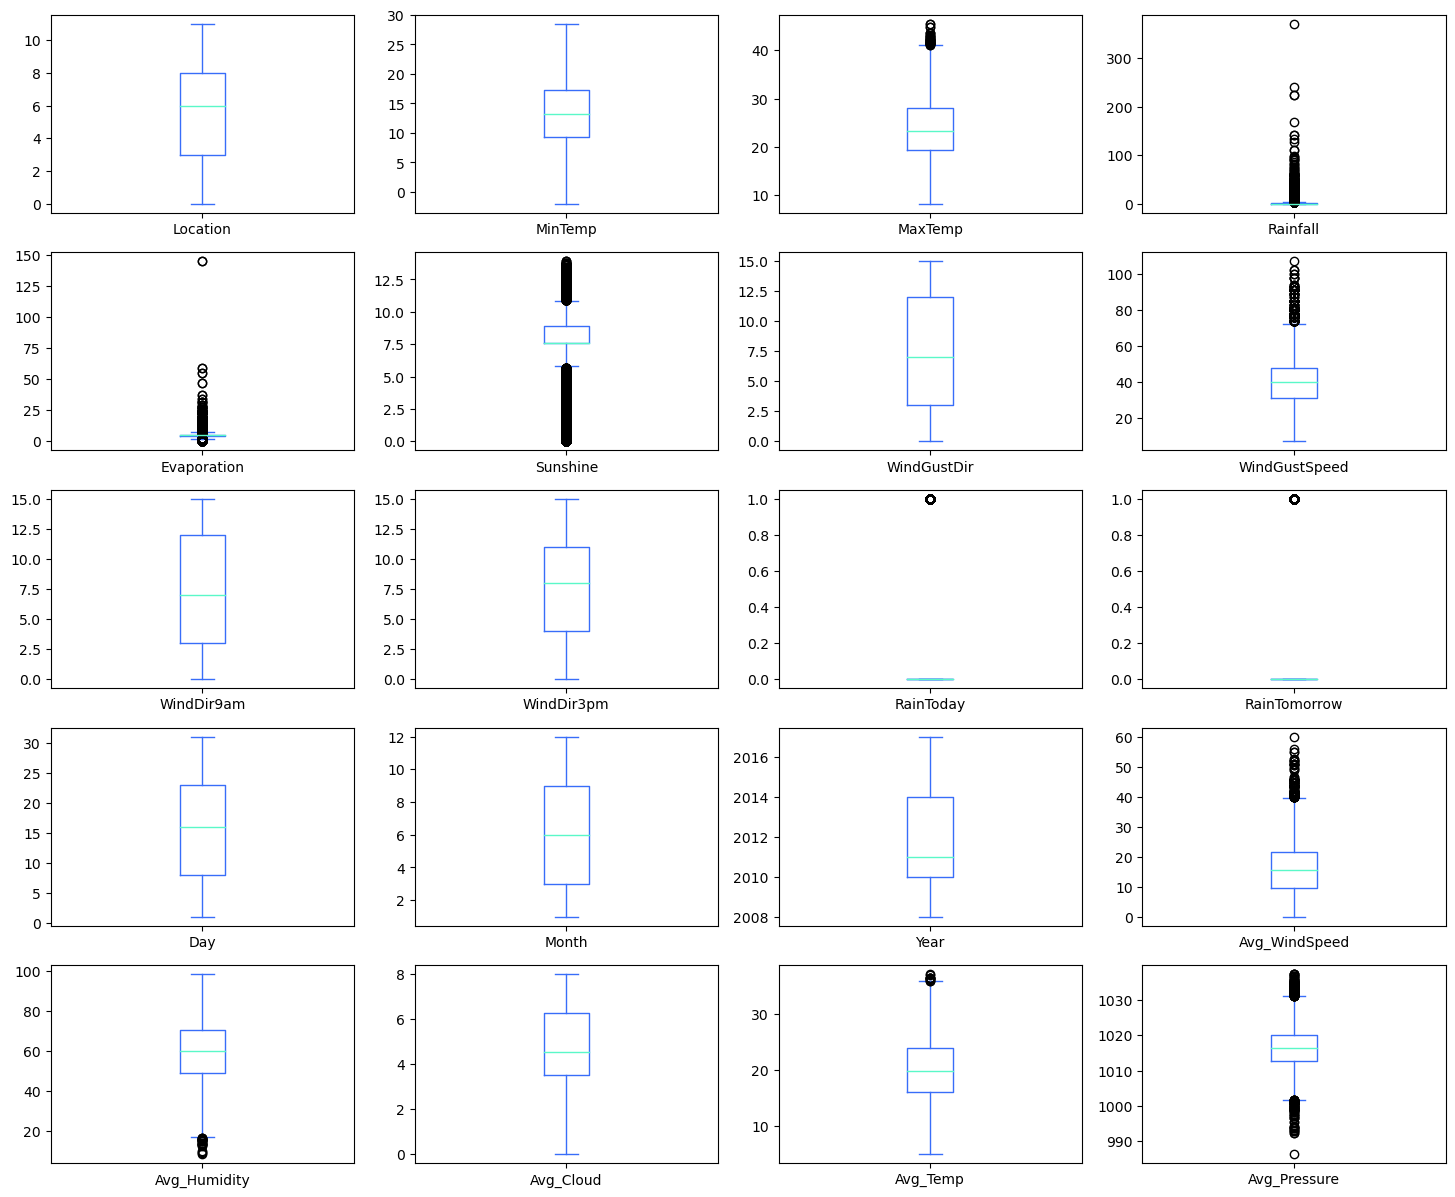

In [373]:
df.plot(kind='box',subplots=True ,layout=(6,4) ,figsize=(18,18))

# Outliers removal using Zscore method

In [374]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,RainToday,RainTomorrow,Day,Month,Year,Avg_WindSpeed,Avg_Humidity,Avg_Cloud,Avg_Temp,Avg_Pressure
0,1.515776,0.038425,1.570089e-01,0.213986,2.305893e-16,3.143679e-16,1.229643,0.277710,1.249535,1.397222,0.556099,0.556282,1.677733,1.616696,1.658896,0.663163,0.822165,8.181841e-01,0.136016,1.461135
1,1.515776,1.076989,2.028121e-01,0.272189,2.305893e-16,3.143679e-16,1.442303,0.277710,0.276260,1.622961,0.556099,0.556282,1.563926,1.616696,1.658896,0.364227,1.578983,4.233111e-16,0.117045,1.170141
2,1.515776,0.054526,3.009450e-01,0.272189,2.305893e-16,3.143679e-16,1.654964,0.422897,1.249535,1.622961,0.556099,0.556282,1.450120,1.616696,1.658896,0.720240,1.610517,5.965158e-01,0.361068,1.339887
3,1.515776,0.742365,6.771214e-01,0.272189,2.305893e-16,3.143679e-16,0.684299,1.174166,0.377652,1.763120,0.556099,0.556282,1.336313,1.616696,1.658896,0.706691,1.831255,4.233111e-16,0.397220,0.200164
4,1.515776,0.800625,1.380408e+00,0.175183,2.305893e-16,3.143679e-16,1.229643,0.059928,1.366114,0.182949,0.556099,0.556282,1.222506,1.616696,1.658896,0.307150,0.128416,1.413183e+00,0.659318,1.299472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,1.013895,1.932140,7.523137e-02,0.272189,2.305893e-16,3.143679e-16,1.534940,0.666009,0.377652,1.537381,0.556099,0.556282,0.598400,0.128611,1.980423,0.478382,1.389778,4.233111e-16,0.696365,0.971893
8421,1.013895,1.783418,2.355231e-01,0.272189,2.305893e-16,3.143679e-16,0.258979,1.319354,0.377652,1.085904,0.556099,0.556282,0.712207,0.128611,1.980423,0.592536,1.326710,4.233111e-16,0.434266,0.785980
8422,1.013895,1.448794,4.972110e-01,0.272189,2.305893e-16,3.143679e-16,0.896959,0.230447,0.377652,1.397222,0.556099,0.556282,0.826013,0.128611,1.980423,0.820845,1.326710,4.233111e-16,0.145053,0.397989
8423,1.013895,1.002628,5.135665e-01,0.272189,2.305893e-16,3.143679e-16,0.379002,0.883791,0.595623,1.085904,0.556099,0.556282,0.939820,0.128611,1.980423,0.706691,1.389778,9.698465e-01,0.080894,0.244409


In [375]:
threshold=3
print(np.where(z<3))
df3=df[(z<3).all(axis=1)]

(array([   0,    0,    0, ..., 8424, 8424, 8424], dtype=int64), array([ 0,  1,  2, ..., 17, 18, 19], dtype=int64))


In [376]:
df3

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,RainToday,RainTomorrow,Day,Month,Year,Avg_WindSpeed,Avg_Humidity,Avg_Cloud,Avg_Temp,Avg_Pressure
0,1,13.4,22.900000,0.6,5.389395,7.632205,13,44.000000,13,14,0,0,1,12,2008,22.0,46.5,6.251591,19.35,1007.40
1,1,7.4,25.100000,0.0,5.389395,7.632205,14,44.000000,6,15,0,0,2,12,2008,13.0,34.5,4.534902,20.75,1009.20
2,1,12.9,25.700000,0.0,5.389395,7.632205,15,46.000000,13,15,0,0,3,12,2008,22.5,34.0,3.283311,22.10,1008.15
3,1,9.2,28.000000,0.0,5.389395,7.632205,4,24.000000,9,0,0,0,4,12,2008,10.0,30.5,4.534902,22.30,1015.20
4,1,17.5,32.300000,1.0,5.389395,7.632205,13,41.000000,1,7,0,0,5,12,2008,13.5,57.5,7.500000,23.75,1008.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,9,2.8,23.400000,0.0,5.389395,7.632205,0,31.000000,9,1,0,0,21,6,2017,12.0,37.5,4.534902,16.25,1022.45
8421,9,3.6,25.300000,0.0,5.389395,7.632205,6,22.000000,9,3,0,0,22,6,2017,11.0,38.5,4.534902,17.70,1021.30
8422,9,5.4,26.900000,0.0,5.389395,7.632205,3,37.000000,9,14,0,0,23,6,2017,9.0,38.5,4.534902,19.30,1018.90
8423,9,7.8,27.000000,0.0,5.389395,7.632205,9,28.000000,10,3,0,0,24,6,2017,10.0,37.5,2.500000,20.55,1017.95


In [377]:
df=df3.copy()
df.shape

(8064, 20)

# Skewness

In [378]:
df.skew()

Location        -0.040809
MinTemp         -0.083008
MaxTemp          0.331997
Rainfall         3.504638
Evaporation      0.853772
Sunshine        -0.721331
WindGustDir      0.121628
WindGustSpeed    0.507816
WindDir9am       0.169365
WindDir3pm      -0.124306
RainToday        1.306659
RainTomorrow     1.292357
Day              0.000534
Month            0.047265
Year             0.431326
Avg_WindSpeed    0.430396
Avg_Humidity    -0.158005
Avg_Cloud       -0.370482
Avg_Temp         0.142750
Avg_Pressure     0.061896
dtype: float64

array([[<Axes: title={'center': 'Location'}>,
        <Axes: title={'center': 'MinTemp'}>,
        <Axes: title={'center': 'MaxTemp'}>,
        <Axes: title={'center': 'Rainfall'}>],
       [<Axes: title={'center': 'Evaporation'}>,
        <Axes: title={'center': 'Sunshine'}>,
        <Axes: title={'center': 'WindGustDir'}>,
        <Axes: title={'center': 'WindGustSpeed'}>],
       [<Axes: title={'center': 'WindDir9am'}>,
        <Axes: title={'center': 'WindDir3pm'}>,
        <Axes: title={'center': 'RainToday'}>,
        <Axes: title={'center': 'RainTomorrow'}>],
       [<Axes: title={'center': 'Day'}>,
        <Axes: title={'center': 'Month'}>,
        <Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Avg_WindSpeed'}>],
       [<Axes: title={'center': 'Avg_Humidity'}>,
        <Axes: title={'center': 'Avg_Cloud'}>,
        <Axes: title={'center': 'Avg_Temp'}>,
        <Axes: title={'center': 'Avg_Pressure'}>]], dtype=object)

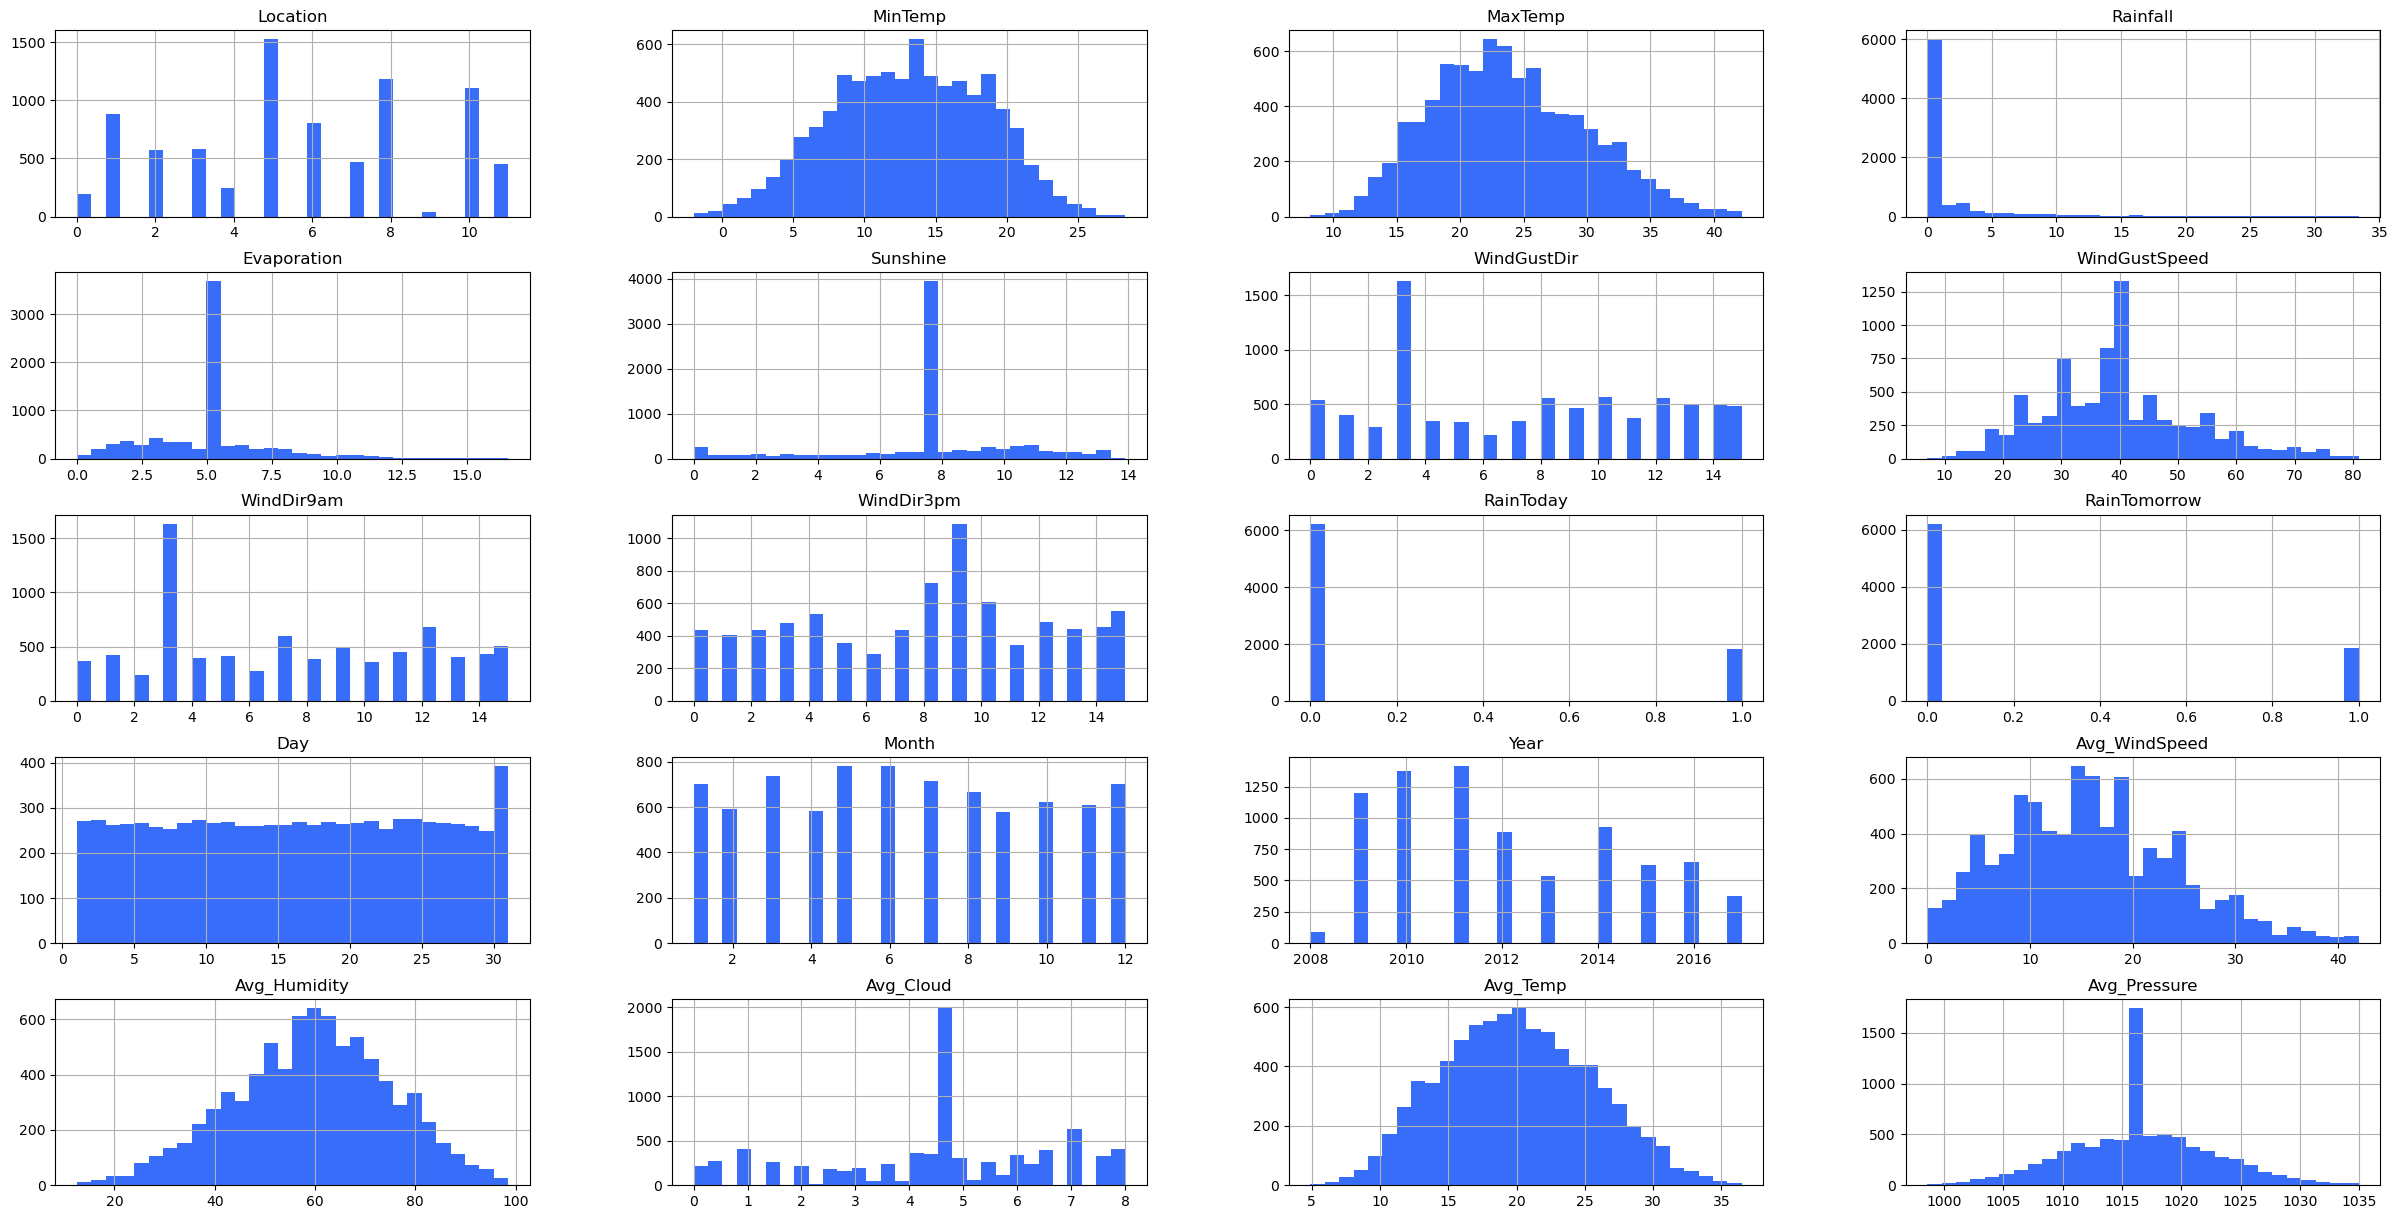

In [379]:
df.hist(bins=30,figsize=(30,15))

# Correlation

In [380]:
cor=df.corr()
cor

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,RainToday,RainTomorrow,Day,Month,Year,Avg_WindSpeed,Avg_Humidity,Avg_Cloud,Avg_Temp,Avg_Pressure
Location,1.000000,0.116424,0.063390,0.021231,0.133349,0.049011,-0.036941,0.241315,-0.041814,-0.030331,0.003070,0.010479,-0.004871,-0.085526,0.478224,0.262379,0.039976,0.039391,0.091969,-0.017092
MinTemp,0.116424,1.000000,0.719165,0.091023,0.374322,0.065864,-0.152682,0.233256,-0.047341,-0.150456,0.058871,0.089358,0.010713,-0.244675,0.039785,0.189135,-0.023110,0.069941,0.820281,-0.435959
MaxTemp,0.063390,0.719165,1.000000,-0.140102,0.471084,0.385358,-0.234396,0.142090,-0.218707,-0.184005,-0.222665,-0.151910,0.017439,-0.161439,0.119375,0.064812,-0.447703,-0.282606,0.962185,-0.378570
Rainfall,0.021231,0.091023,-0.140102,1.000000,-0.096717,-0.166311,0.086390,0.090705,0.124609,0.076213,0.688755,0.270362,-0.015454,0.000935,0.009159,0.050090,0.325135,0.233063,-0.097334,-0.075873
Evaporation,0.133349,0.374322,0.471084,-0.096717,1.000000,0.365820,-0.122106,0.206129,-0.117445,-0.033947,-0.165885,-0.088637,0.014118,-0.052417,0.123137,0.146817,-0.311640,-0.146827,0.469428,-0.270844
Sunshine,0.049011,0.065864,0.385358,-0.166311,0.365820,1.000000,-0.102608,0.011154,-0.076287,-0.069104,-0.217959,-0.316593,0.004269,-0.001858,0.053847,0.024003,-0.443416,-0.601975,0.347121,-0.029834
WindGustDir,-0.036941,-0.152682,-0.234396,0.086390,-0.122106,-0.102608,1.000000,0.002328,0.405457,0.505133,0.122074,0.046754,0.015766,0.033217,-0.095329,0.078928,0.048667,0.122246,-0.224504,-0.052140
WindGustSpeed,0.241315,0.233256,0.142090,0.090705,0.206129,0.011154,0.002328,1.000000,-0.076856,0.074688,0.073627,0.180322,0.000268,0.049076,-0.041864,0.687225,-0.196155,0.041956,0.161256,-0.359212
WindDir9am,-0.041814,-0.047341,-0.218707,0.124609,-0.117445,-0.076287,0.405457,-0.076856,1.000000,0.241862,0.149221,0.030414,-0.012819,0.016235,-0.033197,0.069134,0.079458,0.088737,-0.173706,0.041909
WindDir3pm,-0.030331,-0.150456,-0.184005,0.076213,-0.033947,-0.069104,0.505133,0.074688,0.241862,1.000000,0.099475,0.005214,-0.000074,0.030017,-0.009501,0.066234,-0.010426,0.075034,-0.189337,-0.085466


<Axes: >

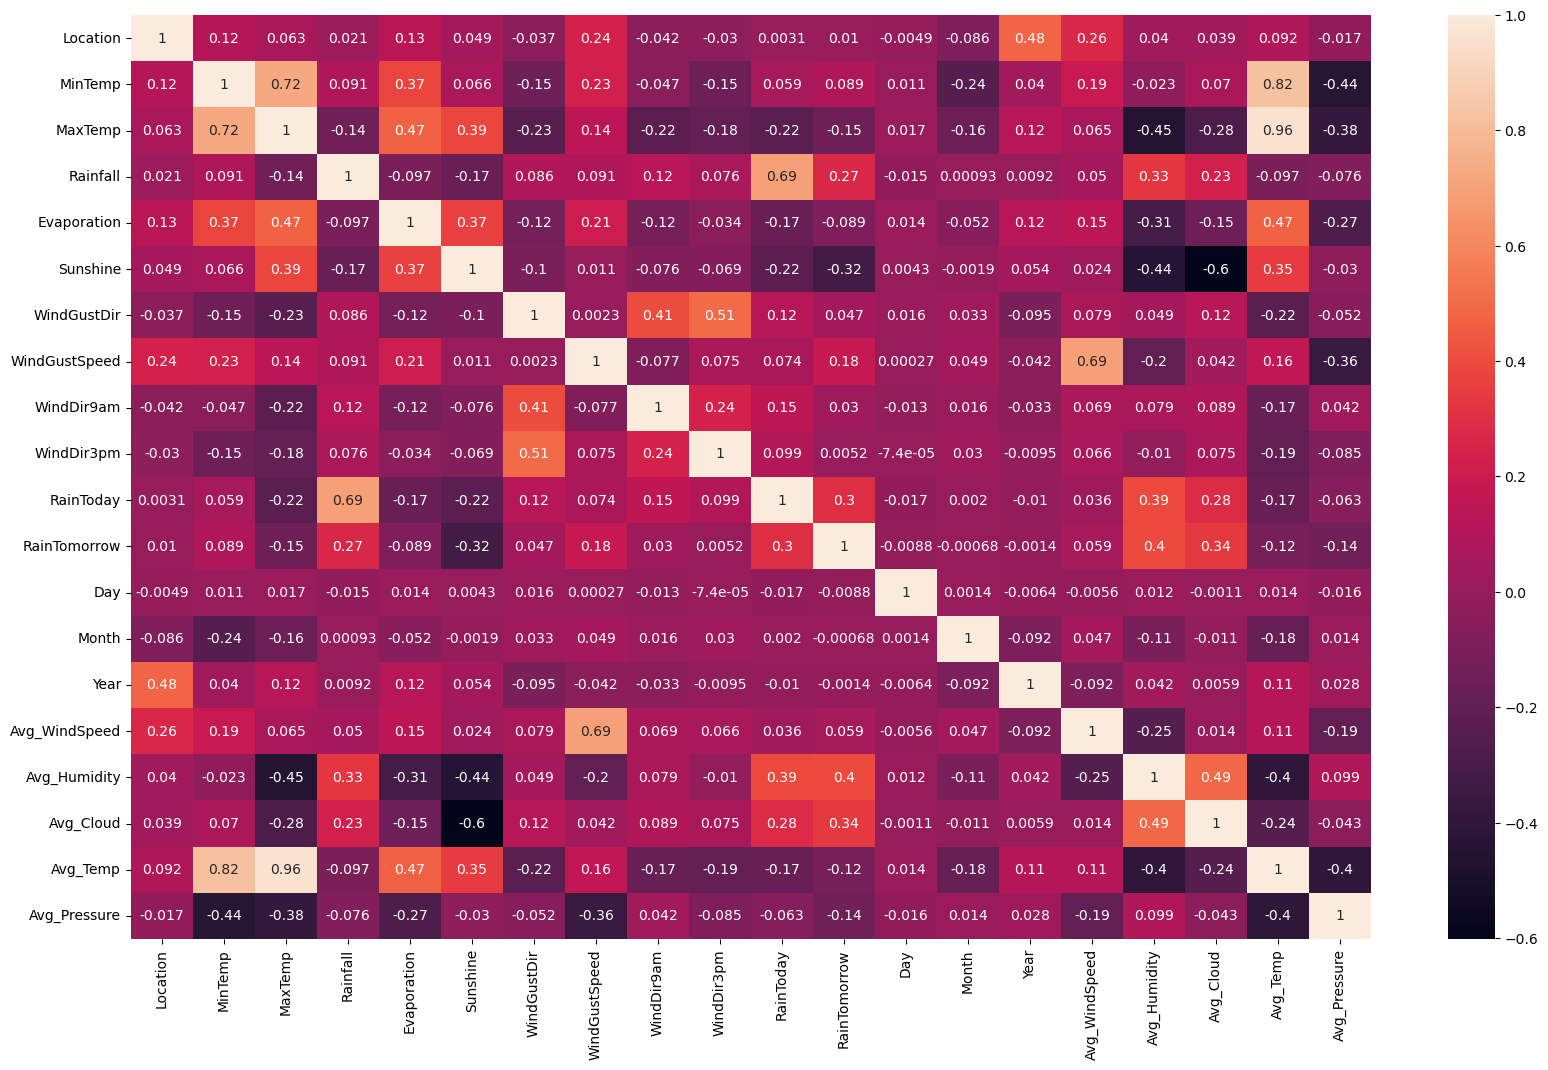

In [381]:
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(),annot=True)

# Machine Learning Model Building

In [383]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

# Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow. 

In [384]:
X=df.drop(['RainTomorrow'], axis=1)
Y=df['RainTomorrow']

In [385]:
X

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,RainToday,Day,Month,Year,Avg_WindSpeed,Avg_Humidity,Avg_Cloud,Avg_Temp,Avg_Pressure
0,1,13.4,22.900000,0.6,5.389395,7.632205,13,44.000000,13,14,0,1,12,2008,22.0,46.5,6.251591,19.35,1007.40
1,1,7.4,25.100000,0.0,5.389395,7.632205,14,44.000000,6,15,0,2,12,2008,13.0,34.5,4.534902,20.75,1009.20
2,1,12.9,25.700000,0.0,5.389395,7.632205,15,46.000000,13,15,0,3,12,2008,22.5,34.0,3.283311,22.10,1008.15
3,1,9.2,28.000000,0.0,5.389395,7.632205,4,24.000000,9,0,0,4,12,2008,10.0,30.5,4.534902,22.30,1015.20
4,1,17.5,32.300000,1.0,5.389395,7.632205,13,41.000000,1,7,0,5,12,2008,13.5,57.5,7.500000,23.75,1008.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,9,2.8,23.400000,0.0,5.389395,7.632205,0,31.000000,9,1,0,21,6,2017,12.0,37.5,4.534902,16.25,1022.45
8421,9,3.6,25.300000,0.0,5.389395,7.632205,6,22.000000,9,3,0,22,6,2017,11.0,38.5,4.534902,17.70,1021.30
8422,9,5.4,26.900000,0.0,5.389395,7.632205,3,37.000000,9,14,0,23,6,2017,9.0,38.5,4.534902,19.30,1018.90
8423,9,7.8,27.000000,0.0,5.389395,7.632205,9,28.000000,10,3,0,24,6,2017,10.0,37.5,2.500000,20.55,1017.95


In [386]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
8420    0
8421    0
8422    0
8423    0
8424    0
Name: RainTomorrow, Length: 8064, dtype: int32

In [387]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y, random_state=42, test_size=.20)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(6451, 19)
(6451,)
(1613, 19)
(1613,)


# Using Logistic Regression

In [388]:
LR=LogisticRegression()
LR.fit(X_train,Y_train)

LogisticRegression()

In [389]:
LRpred=LR.predict(X_test)
LRpred

array([0, 0, 0, ..., 0, 0, 0])

In [390]:
accuracy_score(Y_test,LRpred)

0.8487290762554247

In [391]:
confusion_matrix(Y_test,LRpred)

array([[1192,   61],
       [ 183,  177]], dtype=int64)

In [392]:
print(classification_report(Y_test,LRpred))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1253
           1       0.74      0.49      0.59       360

    accuracy                           0.85      1613
   macro avg       0.81      0.72      0.75      1613
weighted avg       0.84      0.85      0.84      1613



Acurracy using Logistic Regression is 84.87

# Using Decision Tree Classifier

In [393]:
DTC=DecisionTreeClassifier()
DTC.fit(X_train,Y_train)

DecisionTreeClassifier()

In [394]:
DTCpred=DTC.predict(X_test)
DTCpred

array([0, 0, 0, ..., 0, 0, 0])

In [395]:
accuracy_score(Y_test,DTCpred)

0.8437693738375698

In [396]:
confusion_matrix(Y_test,DTCpred)

array([[1114,  139],
       [ 113,  247]], dtype=int64)

In [397]:
print(classification_report(Y_test,DTCpred))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90      1253
           1       0.64      0.69      0.66       360

    accuracy                           0.84      1613
   macro avg       0.77      0.79      0.78      1613
weighted avg       0.85      0.84      0.85      1613



Acurracy using Decision Tree Classifier is 84.37

# Using Random Forest Classifier

In [398]:
RFC=RandomForestClassifier()
RFC.fit(X_train,Y_train)

RandomForestClassifier()

In [399]:
RFCpred=RFC.predict(X_test)
RFCpred

array([0, 0, 0, ..., 0, 0, 0])

In [400]:
accuracy_score(Y_test,RFCpred)

0.9088654680719157

In [401]:
confusion_matrix(Y_test,RFCpred)

array([[1228,   25],
       [ 122,  238]], dtype=int64)

In [402]:
print(classification_report(Y_test,RFCpred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      1253
           1       0.90      0.66      0.76       360

    accuracy                           0.91      1613
   macro avg       0.91      0.82      0.85      1613
weighted avg       0.91      0.91      0.90      1613



Acurracy using Random Forest Classifier is 90.88

# Saving Model

In [403]:
import joblib
joblib.dump(RFC,'Rain_Tomorrow.obj')

['Rain_Tomorrow.obj']